<a href="https://colab.research.google.com/github/Zain-Faisal/Coding/blob/main/Ozone_level_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import SVC


In [ ]:
# 1. Load Data
# Replace 'your_dataset.csv' with your actual data file
data = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')



In [ ]:
data = data.dropna()


In [ ]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
5,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
6,7,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
7,8,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
8,9,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling


In [ ]:
data.shape

(31306, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31306 entries, 2 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31306 non-null  int64  
 1   year     31306 non-null  int64  
 2   month    31306 non-null  int64  
 3   day      31306 non-null  int64  
 4   hour     31306 non-null  int64  
 5   PM2.5    31306 non-null  float64
 6   PM10     31306 non-null  float64
 7   SO2      31306 non-null  float64
 8   NO2      31306 non-null  float64
 9   CO       31306 non-null  float64
 10  O3       31306 non-null  float64
 11  TEMP     31306 non-null  float64
 12  PRES     31306 non-null  float64
 13  DEWP     31306 non-null  float64
 14  RAIN     31306 non-null  float64
 15  wd       31306 non-null  object 
 16  WSPM     31306 non-null  float64
 17  station  31306 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.5+ MB


In [ ]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000,17321.000000
mean,25496.548236,2015.598753,6.183304,15.903066,11.483344,61.941072,82.484955,9.365787,26.707609,932.700191,68.528520,12.334716,1008.824760,0.301189,0.070273,1.925899
std,5649.139336,0.648828,3.580169,8.752948,6.970755,71.304139,82.000521,11.320895,26.741386,1013.616266,53.099001,11.539643,10.358498,13.808392,0.858706,1.310123
min,3.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,1.000000,-16.600000,982.800000,-35.100000,0.000000,0.000000
25%,20855.000000,2015.000000,3.000000,8.000000,5.000000,13.000000,25.000000,2.000000,7.000000,300.000000,31.000000,1.900000,1000.400000,-11.500000,0.000000,1.100000
50%,25397.000000,2016.000000,6.000000,16.000000,11.000000,36.000000,57.000000,5.000000,18.000000,600.000000,64.000000,12.600000,1008.600000,0.100000,0.000000,1.500000
75%,30388.000000,2016.000000,9.000000,23.000000,18.000000,84.000000,114.000000,12.000000,37.000000,1100.000000,90.000000,22.400000,1017.300000,13.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,647.000000,905.000000,111.000000,205.000000,10000.000000,500.000000,39.200000,1036.500000,26.900000,52.100000,9.600000


In [ ]:
X = data[['TEMP']]
y = data['O3']

In [ ]:
y.head()
X.head()

,TEMP
2,-3.0
5,-4.5
6,-4.5
7,-2.1
8,-0.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=2)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [183]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
y_pred = model.predict(X_test)
temp = data['TEMP'][:len(y_pred)]
x_train_prediction = model.predict(X_train)

# Use appropriate metrics for regression
mse = mean_squared_error(y_train, x_train_prediction)
r2 = r2_score(y_train, x_train_prediction)

print('Mean Error of trained data:',sqrt(mse))
print('R-squared of trained data:', r2)

Mean Error of trained data: 42.4864894396515
R-squared of trained data: 0.3607615712858705


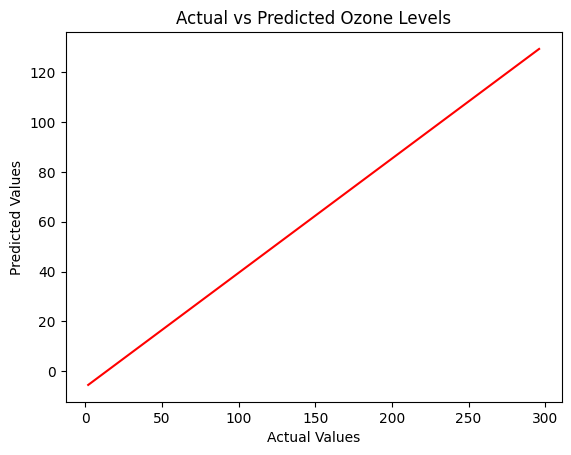

In [184]:

# Plot actual vs predicted values

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')  # Straight line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ozone Levels')
plt.show()

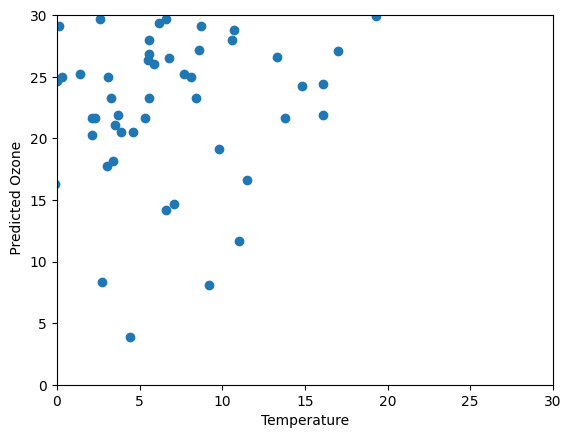

In [191]:
plt.scatter(temp,y_pred)
plt.xlabel("Temperature")
plt.ylim(0,30)
plt.xlim(0,30)
plt.ylabel(" Predicted Ozone")
plt.show()

In [ ]:
# Use appropriate metrics for regression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Use y_test instead of x_train_prediction
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)  # Use y_test instead of x_train_prediction

print('Root Mean Squared Error of test data:', rmse)
print('R-squared of test data:', r2)

Root Mean Squared Error of test data: 41.20894398850857
R-squared of test data: 0.3340889015704438
